<h1> Titanic: Machine Learning from Disaster </h1>

<p>
Author: Christian Camilo Urcuqui López
    <br>
Date:  28 November 2018
</p>

<b> Menu </b>
+ [Exploratory Data Analysis](#Exploratory-Data-Analysis)
+ [Data dictionary](#Data-dictionary)

## Data dictionary

The dictionary was taken from the next URL: https://www.kaggle.com/c/titanic/data

The discription of the data has:

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<hr>
<b> Variable Notes </b>

<b>pclass:</b> A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

<b>age:</b> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp:</b> The dataset defines family relations in this way...
<br>
<b>Sibling</b> = brother, sister, stepbrother, stepsister
<br>
<b>Spouse</b> = husband, wife (mistresses and fiancés were ignored)

<b>parch:</b> The dataset defines family relations in this way...
<br>
<b>Parent</b> = mother, father
<br>
<b>Child</b> = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [16]:
# import the packages
import pandas as pd
import matplotlib.pyplot as plot

In [12]:
# load the data
data = pd.read_csv("../Datasets/train_titanic.csv")
# let's print a short view of the data 
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data analysis

Let's see if the datasets has NaN values and its shape. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In the last printed we can see that the Cabin and Embarked have the most lower number of registers, let's see the features types.

In [14]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Recall that the dependent variable to predict is the feature _Survided_, so we are working in a classification problem, specifically, in a supervised learning approach. 

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

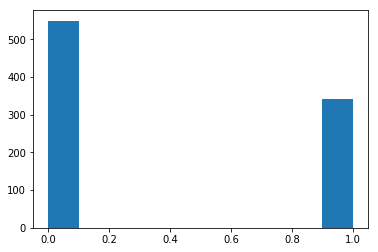

In [18]:
plot.hist(data.Survived)

We are working with a disbalanced dataset, we must apply a tranining and evaluation process like _cross validation_